# Fakebusters: Data description and Pipeline

## Motivation

The goal of our project is to perform person identification in videos, in a way that is robust to deepfake forgeries, in particular those that rely on face swapping techniques (See:) . Existing speaker identification techniques of video rely heavily either on facial recognition of static image data or audio signal processing . Recent research has demostrated the efficacy of deep learning approaches to create high quality forgeries of both facial features (https://www.youtube.com/watch?v=O7JOD-qytb8) and voices (http://talkobamato.me), suggesting the need for an approach that does not rely exclusively on this data to perform person identificaction. This notebook suggest and alternative approach, presenting a dataset and a data pipeline design that can be used to explore new models for this task. 

## Hypothesis

We believe that the 'biometric' signal of facial expressions can be used in the task of speaker identification. Given that face swapping techniques can forge facial features and speech but the facial expressions are not the ones of the real person but of the 'actor' that is wearing their 'mask', a classifier that relies on this signal will be resistant to these kind of fakes.

## Data 

We tested our hypothesis

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
import numpy as np
import pandas as pd
import os
import codecs

Populating the interactive namespace from numpy and matplotlib


In [136]:
#--------------------------------DEFINE USER IDENTITIES-----------------------------------

# Create Dataframe from CSV
identities=['bernie','biden','hillary','justin','may','michelle','modi','obama','pelosi','putin','trump','warren']

In [15]:
#-----------------------------CREATE DATAFRAME WITH ALL CLIPS------------------------------------------


#----VARIABLE AND CONSTANT INITIALIZATION 

# Path to directory containing text files with information about dataset
path='/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/2019-I/cs282_deep_neural_networks/assignments/project/data'
fps=30 # Constant to detMermine Frames per second on each video

# Define empty lists
user_id=[]
video_id=[]
no_frames=[]
file_path=[]
duration=[]
split=[]


# Define dictionary to create DataFrame
dic={'split':'','user_id':'','video_id':'','no_frames':'','file_path':'','duration':''}


# ----EXTRACT FILES IN SUB-DIRECTORIES
for subdir, dirs, files in os.walk(path):
  
    for file in files:
        
        if file.endswith(".csv"):

       
            # ----GET FILE INFORMATION FOR EACH FILE (CLIP)
        
            # Get file path and split into directories
            file_path_i=os.path.join(subdir, file)
            path_array=file_path_i.split('/') 
        
        
            # Get directory names that correspond to utterance (clip), video and user
            video_id_i=path_array[-1][:-4] # -4 is to eliminate .txt from string
            user_id_i=path_array[-3]
            split_i=path_array[-4]
        
            #'''
            # For each clip get number of frames by counting lines in .txt that describes clip
            with codecs.open(file_path_i, 'r', encoding='utf-8',errors='ignore') as f:
                for i, l in enumerate(f):
                
                    pass
            no_frames_i=i-1 #Subtracting the lines in the top of the file
           
        
            # Calculate duration
            duration_i=no_frames_i/fps
        
        
            #'''
            # ----UPDATE LISTS WITH FILE (CLIP) INFORMATION
            user_id.append(user_id_i)
            video_id.append(video_id_i)
            file_path.append(file_path_i)
            split.append(split_i)
            no_frames.append(no_frames_i)
            duration.append(duration_i)  
            #no_frames=np.zeros(len(user_id))
            #duration=np.zeros(len(user_id))
            
        
        
# ----UPDATE DICTIONARY WITH POPULATED LISTS (remove first row which is root folder)
dic['user_id']=user_id
dic['split']=split
dic['video_id']=video_id
dic['no_frames']=no_frames
dic['file_path']=file_path
dic['duration']=duration

#----CREATE DATAFRAME USING DICTIONARY
clips_df=pd.DataFrame(data=dic)
   


### **Clips Detail**

In [16]:

clips_df.head(1000)


,duration,file_path,no_frames,split,user_id,video_id
0,23.500000,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,705,test,putin,wCvqqwwwx8Y_122
1,12.533333,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,376,test,putin,9mhi_AyQAyw_145
2,22.166667,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,665,test,putin,UB45clPRNoc_51
3,29.966667,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,899,test,putin,rHY8yG4mVzs_40
4,33.200000,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,996,test,putin,wCvqqwwwx8Y_25
5,12.766667,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,383,test,putin,UB45clPRNoc_64
6,22.033333,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,661,test,putin,UB45clPRNoc_15
7,28.533333,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,856,test,putin,QiKF8JN1qmk_40
8,11.833333,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,355,test,biden,cn8mH94mxXw_10
9,10.400000,/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/...,312,test,biden,0O9Cd6vjdN0_16


### Data Split

In [36]:
split_sum=clips_df[['split','video_id','duration']].groupby(['split']).agg({'video_id':'nunique','duration':[np.mean,np.sum,np.max]}).reset_index()
split_sum=split_sum.rename(columns={'video_id':'no_videos','duration':'duration (seconds)'})
split_sum.head()

split no_videos duration (seconds)                           
           nunique               mean           sum         amax
0   test        71          28.212207   2003.066667   111.233333
1  train       615          30.224336  18587.966667   279.366667
2    val        81          57.357613   4645.966667  2550.966667

### Data Summary

**Train Data**

In [47]:
train_gen=clips_df.loc[clips_df['split'] == 'train']
train=train_gen[['user_id','video_id','duration']].groupby(['user_id']).agg({'video_id':'nunique','duration':[np.mean,np.sum,np.max]}).reset_index()
train=train.rename(columns={'video_id':'no_videos','duration':'duration (seconds)'})
train.head(14)

user_id no_videos duration (seconds)                         
               nunique               mean          sum        amax
0     bernie        40          39.046667  1561.866667  129.033333
1      biden        98          15.744898  1543.000000   39.600000
2    hillary        29          54.379310  1577.000000  146.600000
3     justin        63          24.350265  1534.066667  154.166667
4        may        46          33.472464  1539.733333  279.366667
5   michelle        34          45.037255  1531.266667   54.566667
6       modi        32          48.966667  1566.933333  149.966667
7      obama        32          48.208333  1542.666667   55.600000
8     pelosi        58          26.610920  1543.433333  111.033333
9      putin        64          24.220833  1550.133333  108.900000
10     trump        71          21.746948  1544.033333   86.966667
11    warren        48          32.371528  1553.833333  149.833333

**Validation Data**

In [46]:
val_gen=clips_df.loc[clips_df['split'] == 'val']
val=val_gen[['user_id','video_id','duration']].groupby(['user_id']).agg({'video_id':'nunique','duration':[np.mean,np.sum,np.max]}).reset_index()
val=val.rename(columns={'video_id':'no_videos','duration':'duration (seconds)'})
val.head(14)

user_id no_videos duration (seconds)                          
               nunique               mean          sum         amax
0     bernie         6          37.422222   224.533333    89.566667
1      biden        14          13.202381   184.833333    19.133333
2    hillary         4          42.291667   169.166667    61.433333
3     justin         9          22.159259   199.433333    69.033333
4        may         4          45.633333   182.533333   142.900000
5   michelle         5          37.946667   189.733333    47.900000
6       modi         1        2550.966667  2550.966667  2550.966667
7      obama         5          43.226667   216.133333    54.766667
8     pelosi         7          25.180952   176.266667    44.100000
9      putin         7          26.523810   185.666667    59.966667
10     trump        10          20.010000   200.100000    41.033333
11    warren         9          18.511111   166.600000    35.966667

**Test Data**

In [45]:
test_gen=clips_df.loc[clips_df['split'] == 'test']
test=test_gen[['user_id','video_id','duration']].groupby(['user_id']).agg({'video_id':'nunique','duration':[np.mean,np.sum,np.max]}).reset_index()
test=test.rename(columns={'video_id':'no_videos','duration':'duration (seconds)'})
test.head(14)

user_id no_videos duration (seconds)                        
               nunique               mean         sum        amax
0     bernie         2          65.416667  130.833333   78.566667
1      biden        13          13.774359  179.066667   23.900000
2    hillary         5          34.000000  170.000000   68.133333
3     justin         9          21.629630  194.666667   34.700000
4        may         8          25.666667  205.333333   59.966667
5   michelle         3          45.277778  135.833333   50.033333
6      obama         4          50.966667  203.866667   54.866667
7     pelosi         6          38.361111  230.166667  111.233333
8      putin         8          23.087500  184.700000   33.200000
9      trump         8          23.208333  185.666667   53.966667
10    warren         5          36.586667  182.933333   72.666667

**Lenght distribution in Data**

(array([ 2.,  0.,  2.,  0.,  1.,  3., 34., 33., 33., 23., 25., 25., 15.,
        22., 25., 22., 19., 17.,  3., 16., 11., 11., 15., 12.,  2.,  9.,
        12., 11.,  3.,  6.]),
 array([ 4.96666667,  5.8       ,  6.63333333,  7.46666667,  8.3       ,
         9.13333333,  9.96666667, 10.8       , 11.63333333, 12.46666667,
        13.3       , 14.13333333, 14.96666667, 15.8       , 16.63333333,
        17.46666667, 18.3       , 19.13333333, 19.96666667, 20.8       ,
        21.63333333, 22.46666667, 23.3       , 24.13333333, 24.96666667,
        25.8       , 26.63333333, 27.46666667, 28.3       , 29.13333333,
        29.96666667]),
 <a list of 30 Patch objects>)

/Users/dsrincon/anaconda/envs/dlnd/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


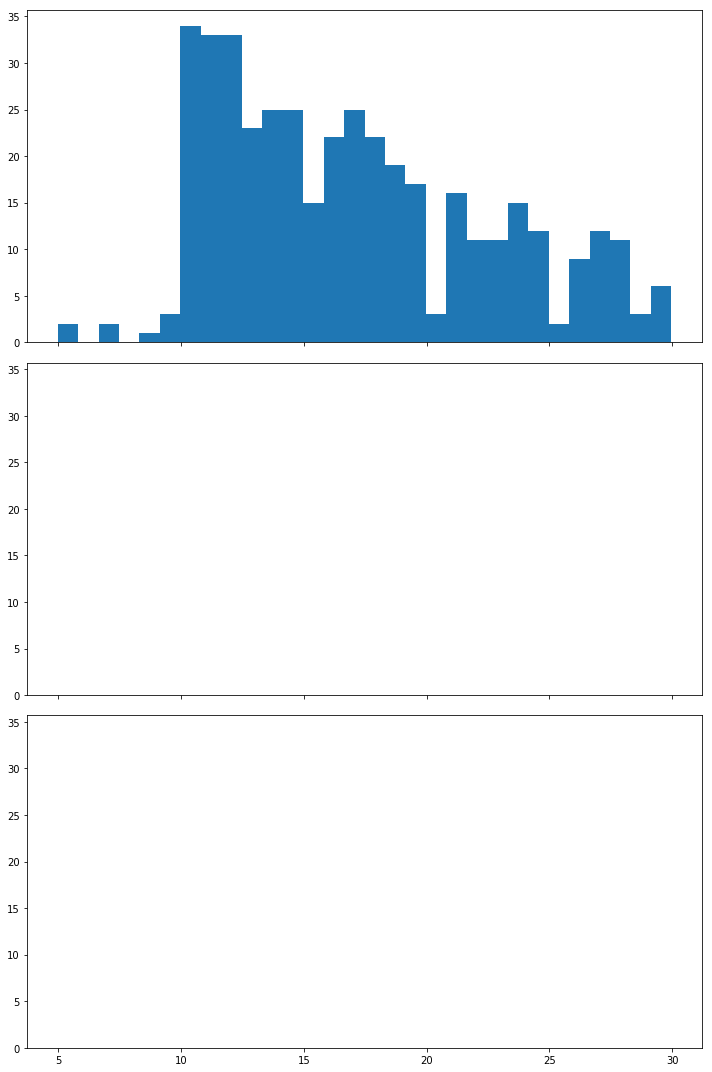

In [66]:

fig, axs = plt.subplots(3, 1,figsize=(10, 15), sharey=True,sharex=True, tight_layout=True)

axs[0].hist(train_gen['duration'],bins=30)
#axs[1].hist(val_gen['duration'],bins=30)
#axs[2].hist(test_gen['duration'],bins=30)

### Dataset Summary

In [141]:
print('Total number of Celebrities: {:,}'.format(user_sum[['name']].count()[0]))
print('Total number of videos: {:,}'.format(user_sum[['no_videos']].sum()[0]))
print('Total number of clips: {:,}'.format(user_sum[['no_clips']].sum()[0]))
print('Average duration of clip (seconds): {:.2f}'.format(user_sum[['average_duration']].mean()[0]))
print('Aggregate duration of videos (seconds): {:,}'.format(int(clips_df[['duration']].sum()[0])))

#dataset_sum=clips_df[['user_id',me','video_id','utterance_no','duration']].agg({'user_id':'count','video_id':'nunique','utterance_no':'count','duration':'mean'})

Total number of Celebrities: 118
Total number of videos: 4,911
Total number of clips: 36,237
Average duration of clip (seconds): 7.73
Aggregate duration of videos (seconds): 289,487


# Pipeline